In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t1 = pd.read_csv('./enrich/fib1/Enrichment_GO/_FINAL_GO.csv',sep=',')
t2 = pd.read_csv('./enrich/fib2/Enrichment_GO/_FINAL_GO.csv',sep=',')
t3 = pd.read_csv('./enrich/fib3/Enrichment_GO/_FINAL_GO.csv',sep=',')
# t1['_LogP_MyList'] = np.absolute( t1['_LogP_MyList'])

# t2 = t2.loc[:,['Description','_LogP_MyList']]
# t2['_LogP_MyList'] = np.absolute( t2['_LogP_MyList'])

# t3 = t3.loc[:,['Description','_LogP_MyList']]
# t3['_LogP_MyList'] = np.absolute(t3['_LogP_MyList'])



In [3]:

t1 = t1.loc[:,['Description','Enrichment','Hits']]
t1['Enrichment'] = np.absolute( t1['Enrichment'])
# t1 = t1.set_index('Description')

t2 = t2.loc[:,['Description','Enrichment','Hits']]
t2['Enrichment'] = np.absolute( t2['Enrichment'])
# t2 = t2.set_index('Description')

t3 = t3.loc[:,['Description','Enrichment','Hits']]
t3['Enrichment'] = np.absolute(t3['Enrichment'])
# t3 = t3.set_index('Description')



In [4]:
t1.columns = ['Description', 'Fib1_s', 'Fib1_Hits']
t2.columns = ['Description', 'Fib2_s', 'Fib2_Hits']
t3.columns = ['Description', 'Fib3_s', 'Fib3_Hits']

In [5]:
df_inter = t1.merge(t2, how='inner',on=['Description']).merge(t3, how='inner', on='Description')
df_inter = df_inter.set_index('Description')
df_inter = df_inter.loc[list(set(df_inter.index)),:]
df_inter = df_inter.drop_duplicates(subset=None, keep=False, inplace=False)

In [6]:
inter = list(df_inter.index)

In [7]:
interst1 =[
        'cell-cell adhesion',
    'Focal adhesion: PI3K-Akt-mTOR-signaling pathway',
    'cell-cell adhesion via plasma-membrane adhesion molecules',
    'regulation of cell-substrate adhesion',

    'response to wounding',
    'ossification',
    'positive regulation of locomotion',
    'connective tissue development',
    'negative regulation of Wnt signaling pathway',
    'negative regulation of cell differentiation',
    'negative regulation of locomotion',
    'positive regulation of apoptotic process',
    'regulation of ERK1 and ERK2 cascade',
    'inflammatory response',



]
interst2 = [

    'regulation of apoptotic signaling pathway',
    'positive regulation of apoptotic process',
    
]
interst3 = [
    'extracellular matrix organization',

  
    
    
    'cell-matrix adhesion',
    

    
]

In [8]:
df_inter.to_csv('./enrich/pathways_inter.csv')
# htmp.to_csv('./enrich/pathways_interest.csv')


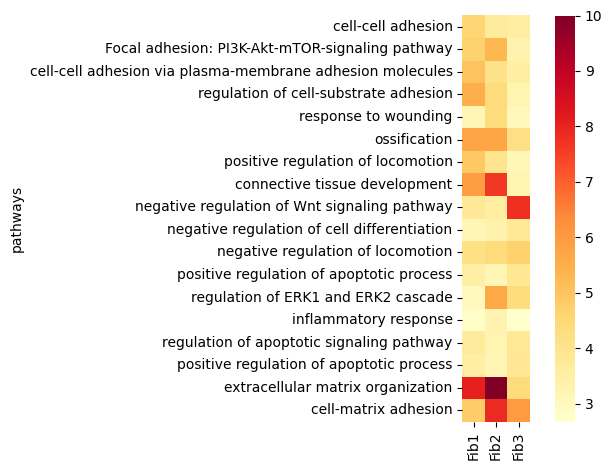

In [9]:
fig = plt.figure()
interst = interst1 + interst2 + interst3
htmp = pd.DataFrame(columns=['pathways','Fib1', 'Fib2', 'Fib3','Fib1_Hits','Fib2_Hits','Fib3_Hits'])
htmp['pathways'] = interst
# htmp['Fib1'] = list(t1.loc[interst, '_LogP_MyList'])
# htmp['Fib2'] = list(t2.loc[interst, '_LogP_MyList'])
# htmp['Fib3'] = list(t3.loc[interst, '_LogP_MyList'])

htmp['Fib1'] = list(df_inter.loc[interst, 'Fib1_s'])
htmp['Fib2'] = list(df_inter.loc[interst, 'Fib2_s'])
htmp['Fib3'] = list(df_inter.loc[interst, 'Fib3_s'])
htmp['Fib1_Hits'] = list(df_inter.loc[interst,'Fib1_Hits'])
htmp['Fib2_Hits'] = list(df_inter.loc[interst,'Fib2_Hits'])
htmp['Fib3_Hits'] = list(df_inter.loc[interst,'Fib3_Hits'])
htmp = htmp.set_index('pathways')
sns.heatmap(htmp.iloc[:,:3],cmap='YlOrRd',square=True,vmax=10)
plt.tight_layout()

plt.savefig('./figures/pathways_hp.jpg',dpi=400, )

In [ ]:
def find_gene(x, gene='NEGR1'):
    x = list(x)
#     print(x[1].split('|'))

    if gene in x[1].split('|'):
        return True
    elif gene in x[3].split('|'):
        return True
    elif gene in x[5].split('|'):
        return True
    else:
        return False

In [21]:
df_inter['NEGR1'] = df_inter.apply(find_gene, axis=1)

In [22]:
df_inter[df_inter['NEGR1']].to_csv('./enrich/NEGR1_pathways.csv')